In [2]:
import moneymaker as mm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import yfinance as yf
from sklearn.pipeline import make_pipeline

plt.rcParams["axes.grid"] = True
plt.style.use('dark_background')
plt.rcParams["grid.color"] = "#222222"
plt.rcParams["figure.figsize"] = (15,8)


Open        High         Low       Close        Volume  \
count  505.000000  505.000000  505.000000  505.000000  5.050000e+02   
mean    48.795583   49.422913   48.129665   48.745692  2.572985e+07   
std     10.517329   10.448653   10.593825   10.535959  1.154251e+07   
min     29.173428   29.325888   27.003135   28.204868  3.979400e+06   
25%     39.573633   40.175111   38.835414   39.530216  1.798260e+07   
50%     52.270000   53.217509   51.576609   52.730000  2.325160e+07   
75%     58.761607   59.548687   58.130492   58.820000  3.092350e+07   
max     63.646662   63.961890   63.400389   63.850540  8.443940e+07   

        Dividends  Stock Splits  
count  505.000000         505.0  
mean     0.013782           0.0  
std      0.108738           0.0  
min      0.000000           0.0  
25%      0.000000           0.0  
50%      0.000000           0.0  
75%      0.000000           0.0  
max      0.870000           0.0

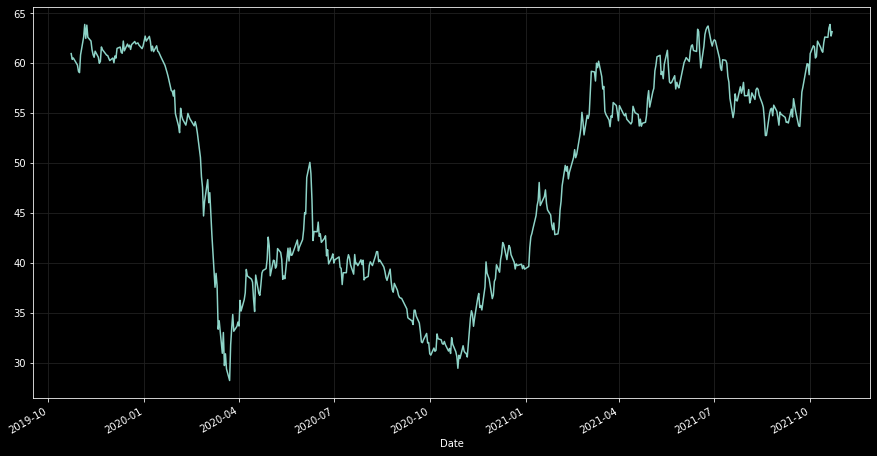

In [3]:
# get historical market data
stock = yf.Ticker("XOM")
ohlcv = stock.history(period='2y')
ohlcv.Close.plot()
ohlcv.describe()

In [14]:
# define signal

def compare_ma(window,col):
    return make_pipeline(
        mm.make_union(
            make_pipeline(mm.FromOHLCV('c')),
            make_pipeline(mm.FromOHLCV('cv'), mm.VWEMA(window)),
            ),
            mm.IsLargestCol(colidx=col)
        )

def above_ma(window):
    return compare_ma(window,0)

def below_ma(window):
    return compare_ma(window,1)

signal_pipe = make_pipeline(
    mm.make_union(
        above_ma(50),
        below_ma(200)
    ),
    mm.Logic("AND")
)

# define backtest

backtest_pipe = make_pipeline(
    mm.make_union(
    make_pipeline(mm.FromOHLCV('c')),
    signal_pipe
    ),
    mm.SimpleBacktester(buy_on="next", add_buy_and_hold=True, allocation_factor=1)
)


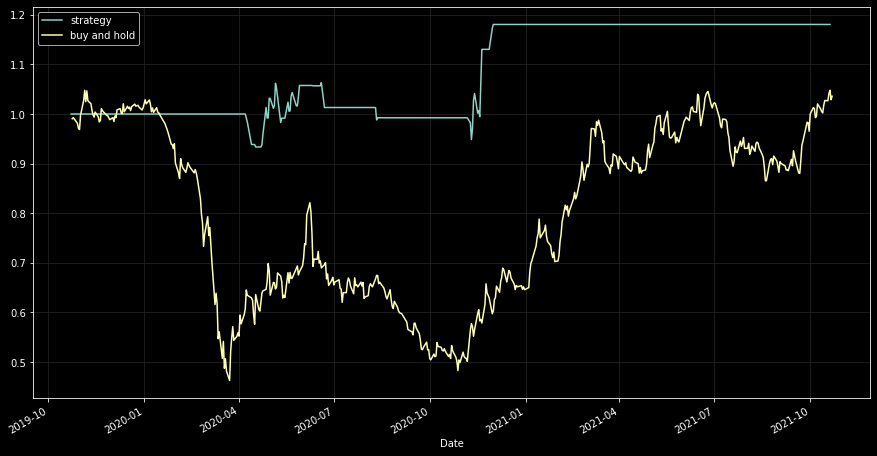

In [15]:
bt = backtest_pipe.fit_transform(ohlcv)
bt.plot()